In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import datasets, linear_model
hp=pd.read_csv(r'C:\Users\shanmukh\Downloads\HousingPrice.csv')
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
hp.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
hp.shape

(1460, 81)

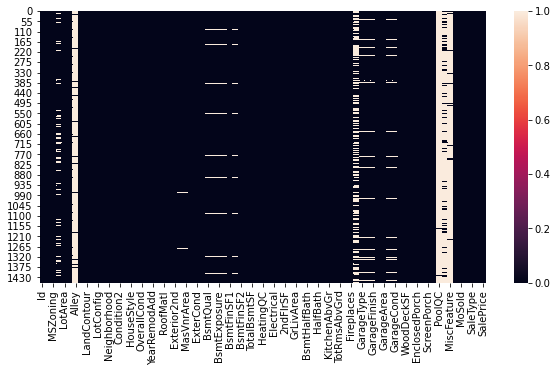

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(hp.isnull())

In [12]:
hp.drop(["PoolQC","MiscFeature","Alley","Fence","FireplaceQu"],axis=1, inplace=True)


In [13]:
hp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


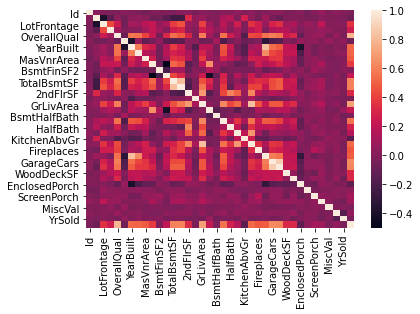

In [14]:
corr=hp.corr().round(2)
sns.heatmap(data=corr)

In [15]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [16]:
hp.corr()['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [ ]:
hp.info()

In [17]:
numeric_cols = hp.select_dtypes(['float64','int64']).columns
categoric_cols = hp.select_dtypes('object').columns

numeric = hp[numeric_cols]
categoric = hp[categoric_cols]


In [ ]:
numeric

In [19]:
def mean_imputation(numeric):
    
    for col in numeric.columns:
        mean = numeric[col].mean()
        numeric[col] = numeric[col].fillna(mean)
    return numeric

mean = mean_imputation(numeric)

def mode_imputation(categoric):
   
    for col in categoric.columns:
        mode = categoric[col].mode().iloc[0]
        categoric[col] = categoric[col].fillna(mode)
    return categoric

mode = mode_imputation(categoric)

hp = pd.concat([mean, mode], axis = 1)


<ipython-input-19-f4ed12e74629>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric[col] = numeric[col].fillna(mean)
<ipython-input-19-f4ed12e74629>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoric[col] = categoric[col].fillna(mode)


In [20]:
hp.shape

(1460, 76)

In [21]:
hp.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
                ..
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
Length: 76, dtype: int64

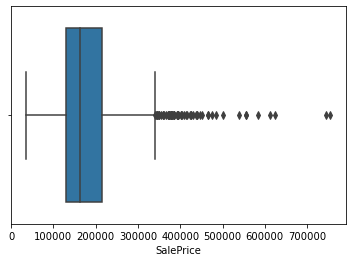

In [23]:
sns.boxplot(hp['SalePrice'])

In [24]:
from scipy import stats

In [25]:
X=df["OverallQual"]
Y=hp["SalePrice"]

NameError: name 'df' is not defined

In [26]:
df_outlier_Zscore=df[(zs<3).all(axis=1)]

NameError: name 'df' is not defined

In [27]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

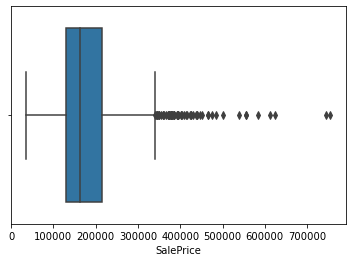

In [28]:
sns.boxplot(hp['SalePrice'])

In [29]:
hp.drop(hp[hp['SalePrice'] > 300000].index, inplace=True)
hp.shape

(1345, 76)

In [30]:
df_outlier_Zscore=df[(zs<3).all(axis=1)]

NameError: name 'df' is not defined

In [31]:
df=dataframe(d)

NameError: name 'dataframe' is not defined

In [32]:
df=hp(d)
print(df)

NameError: name 'd' is not defined

In [33]:
df=hp.head()

In [34]:
print(df)

   Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  Electrical  KitchenQual  \
0          2003       196.0         706  ...       SBrkr           Gd   
1          1976         0.0         978  ...       SBrkr           TA   
2          2002       162.0         486  ...       SBrkr           Gd   
3          1970         0.0         216  ...       SBrkr           Gd   
4          2000       350.0         655  ...       SBrkr           Gd   

   Functional  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0

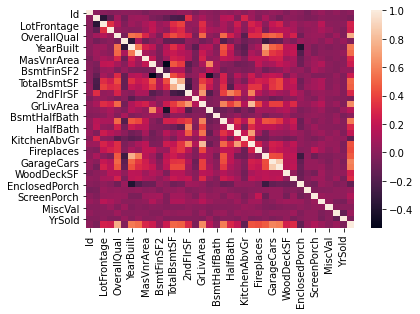

In [35]:
corr=hp.corr().round(2)
#plt.figure(figsize=(15,10))
sns.heatmap(data=corr)

In [36]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1345 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1345 non-null   int64  
 1   MSSubClass     1345 non-null   int64  
 2   LotFrontage    1345 non-null   float64
 3   LotArea        1345 non-null   int64  
 4   OverallQual    1345 non-null   int64  
 5   OverallCond    1345 non-null   int64  
 6   YearBuilt      1345 non-null   int64  
 7   YearRemodAdd   1345 non-null   int64  
 8   MasVnrArea     1345 non-null   float64
 9   BsmtFinSF1     1345 non-null   int64  
 10  BsmtFinSF2     1345 non-null   int64  
 11  BsmtUnfSF      1345 non-null   int64  
 12  TotalBsmtSF    1345 non-null   int64  
 13  1stFlrSF       1345 non-null   int64  
 14  2ndFlrSF       1345 non-null   int64  
 15  LowQualFinSF   1345 non-null   int64  
 16  GrLivArea      1345 non-null   int64  
 17  BsmtFullBath   1345 non-null   int64  
 18  BsmtHalf

In [37]:
for col in hp.select_dtypes(include="float64").columns:
    hp[col]=hp[col].astype(np.int64)

In [38]:
categoric_cols = hp.select_dtypes('object').columns
numeric_cols=hp.select_dtypes('int64').columns
categoric = hp[categoric_cols]
numeric=hp[numeric_cols]
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
for col in categoric.columns:
    categoric[col] = pd.DataFrame(ordinal_encoder.fit_transform(categoric))
categoric

<ipython-input-38-a7be6b64360f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoric[col] = pd.DataFrame(ordinal_encoder.fit_transform(categoric))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [39]:
categoric_cols = hp.select_dtypes('object').columns
numeric_cols=hp.select_dtypes('int64').columns
categoric = hp[categoric_cols]
numeric=hp[numeric_cols]
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
for col in categoric.columns:
    categoric[col] = pd.DataFrame(ordinal_encoder.fit_transform(categoric))


<ipython-input-39-0a3ec0b47cfd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoric[col] = pd.DataFrame(ordinal_encoder.fit_transform(categoric))


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [40]:
categoric

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,3.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,3.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,3.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,3.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,NaN,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [41]:
df = pd.concat([numeric, categoric], axis = 1)

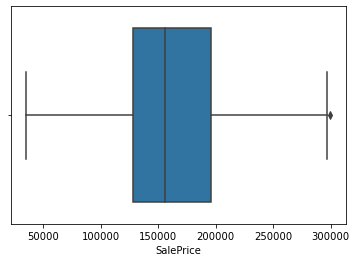

In [42]:
sns.boxplot(hp['SalePrice'])

In [44]:
from scipy import stats
X=df["OverallQual"]
Y=hp["SalePrice"]

In [45]:
from sklearn.model_selection import train_test_split 

In [46]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3
                                               ,random_state=10)

In [47]:
from sklearn.linear_model import LinearRegression
x=linear_model.LinearRegression()
x.fit(X_train,y_train)


ValueError: Expected 2D array, got 1D array instead:
array=[ 8  6  5  7  7  5  6  8  6  5  4  5  7  7  6  6  8  5  6  6  6  7  5  5
  5  5  6  8  7  5  8  5  7  4  7  5  6  7  7  5  5  5  6  5  6  6  6  5
  6  6  2  6  7  5  5  6  6  5  6  5  5  7  5  7  5  7  6  8  5  7  4  5
  8  7  5  4  5 10  8  7  7  3  6  5  6  5  5  6  4  5  6  4  5  6  6  3
  7  7  6  8  8  7  5  7  5  5  6  8  4  6  4  8  5  6  6  5  9  6  8  5
  6  4  5  5  7  4  5  4  4  5  5  7  5  6  5  6  6  5  3  6  5  5  7  7
  7  5  5  6  6  7  7  4  6  4  6  5  5  4  7  6  7  7  5  5  5  4  6  7
  5  5  7  6  6  6  6  6  6  6  8  6  7  5  6  4  5  6  7  5  4  5  7  8
  5  7  8  6  7  6  7  7  7  7  5  6  8  6  5  5  4  5  6  8  7  5  7  5
  7  6  5  7  7  5  6  5  6  6  5  5  8  5  7  5  5  5  7  5  5  7  8  7
  6  5  8  8  7  6  7  5  7  8  5  5  8  8  5  7  7  7  6  6  5  7  4  6
  7  6  7  6  4  7  5  5  3  6  6  7  8  7  5  7  5  5  7  6  5  6  7  7
  8  6  1  4  5  6  7  5  5  4  6  5  6  7  6  6  6  6  5  6  5  7  5  4
  7  8  5  7  6  8  5  8  5  3  6  5  5  6  5  4  7  4  6  7  6  4  6  6
  5  7  7  3  7  5  6  6  4  7  5  4  5  6  7  5  6  7  5  4  5  6  6  5
  8  5  3  8  6  7  6  4  4  5  5  6  5  4  7  4  4  6  7  6  7  7  6  5
  6  6  7  6  5  5  5  5  6  4  8  6  7  6  6  7  7  7  6  5  7  5  5  6
  3  7  4  5  4  7  4  5  5  5  9  8  6  6  8  5  4  8  7  7  7  5  2  6
  8  7  4  4  4  6  4  6  7  7  3  4  5  8  6  5  4  6  5  5  5  6  6  5
  5  7  4  5  6  6  7  6  5  6  6  6  6  5  5  6  6  7  6  6  7  6  7  5
  5  5  5  5  6  7  7  6  6  8  6  4  7  6  5  7  6  5  5  5  7  6  3  3
  5  4  7  8  7  8  7  6  7  6  7  6  5  7  6  5  5  6  7  7  8  5  5  7
  5  5  7  7  5  6  5  7  5  6  5  6  8  5  8  5  8  5  8  4  5  6  8  8
  4  7  5  7  7  6  7  7  5  7  5  5  6  5  5  6  5  7  6  5  7  4  7  5
  5  5  6  5  7  7  7  7  6  6  5  5  6  4  7  7  7  5  6  7  4  6  8  4
  7  6  6  7  7  5  8  8  6  8  4  5  5  7 10  4  6  5  6  6  5  8  8  7
  6  6  4  6  7  6  5  6  6  5  4  6  4  6  6  4  6  7  6  6  6  5  5  8
  6  6  5  7  5  6  8  4  6  4  7  8  7  7  8  3  4  4  6  4  6  7  7  5
  7  5  6  7  6  8  6  6  6  6  4  7  7  5  5  6  6  7  4  7  5  7  7  7
  6  5  5  6  6  7  5  7  5  6  6  7  5  5  5  7  8  4  6  7  7  5  5  6
  5  5  6  6  6  3  4  7  7  7  5  8  6  6  7  6  7  5  5  5  5  7  6  6
  5  8  7  5  8  3  6  6  5  4  5  7  8  4  5  6  6  7  5  5  7  7  7  5
  6  5  6  7  5  8  7  6  7  6  8  5  5  5  7  7  7  7  3  8  6  6  7  7
  7  6  7  7  6  5  5  6  6  6  6  5  5  7  6  8  6  6  6  6  6  6  7  8
  7  8  5  5  6  5  6  6  5  6  7  5  5  4  5  4  5  5  5  5  6  8  6  5
  5  4  6  5  5  4  6  5  7  5  6  8  7  5  7  5  5  8  4  6  4  5  6  5
  6  5  7  7  5  4  4  6  6  6  7  8  5  6  6  8  5  6  6  5  8  4  6  8
  7  6  6  5  6  4  6  5  6  5  4  7  7  7  5  6  4  6  6  5  4  5  5  4
  5  5  6  3  5  7  6  8  6  4  5  6  8  4  6  4  7  5  7  5  7  7  7  6
  6  6  7  7  6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [48]:
from sklearn.linear_model import LinearRegression
x=linear_model.LinearRegression()
x.fit(X_train,y_train)


ValueError: Expected 2D array, got 1D array instead:
array=[ 8  6  5  7  7  5  6  8  6  5  4  5  7  7  6  6  8  5  6  6  6  7  5  5
  5  5  6  8  7  5  8  5  7  4  7  5  6  7  7  5  5  5  6  5  6  6  6  5
  6  6  2  6  7  5  5  6  6  5  6  5  5  7  5  7  5  7  6  8  5  7  4  5
  8  7  5  4  5 10  8  7  7  3  6  5  6  5  5  6  4  5  6  4  5  6  6  3
  7  7  6  8  8  7  5  7  5  5  6  8  4  6  4  8  5  6  6  5  9  6  8  5
  6  4  5  5  7  4  5  4  4  5  5  7  5  6  5  6  6  5  3  6  5  5  7  7
  7  5  5  6  6  7  7  4  6  4  6  5  5  4  7  6  7  7  5  5  5  4  6  7
  5  5  7  6  6  6  6  6  6  6  8  6  7  5  6  4  5  6  7  5  4  5  7  8
  5  7  8  6  7  6  7  7  7  7  5  6  8  6  5  5  4  5  6  8  7  5  7  5
  7  6  5  7  7  5  6  5  6  6  5  5  8  5  7  5  5  5  7  5  5  7  8  7
  6  5  8  8  7  6  7  5  7  8  5  5  8  8  5  7  7  7  6  6  5  7  4  6
  7  6  7  6  4  7  5  5  3  6  6  7  8  7  5  7  5  5  7  6  5  6  7  7
  8  6  1  4  5  6  7  5  5  4  6  5  6  7  6  6  6  6  5  6  5  7  5  4
  7  8  5  7  6  8  5  8  5  3  6  5  5  6  5  4  7  4  6  7  6  4  6  6
  5  7  7  3  7  5  6  6  4  7  5  4  5  6  7  5  6  7  5  4  5  6  6  5
  8  5  3  8  6  7  6  4  4  5  5  6  5  4  7  4  4  6  7  6  7  7  6  5
  6  6  7  6  5  5  5  5  6  4  8  6  7  6  6  7  7  7  6  5  7  5  5  6
  3  7  4  5  4  7  4  5  5  5  9  8  6  6  8  5  4  8  7  7  7  5  2  6
  8  7  4  4  4  6  4  6  7  7  3  4  5  8  6  5  4  6  5  5  5  6  6  5
  5  7  4  5  6  6  7  6  5  6  6  6  6  5  5  6  6  7  6  6  7  6  7  5
  5  5  5  5  6  7  7  6  6  8  6  4  7  6  5  7  6  5  5  5  7  6  3  3
  5  4  7  8  7  8  7  6  7  6  7  6  5  7  6  5  5  6  7  7  8  5  5  7
  5  5  7  7  5  6  5  7  5  6  5  6  8  5  8  5  8  5  8  4  5  6  8  8
  4  7  5  7  7  6  7  7  5  7  5  5  6  5  5  6  5  7  6  5  7  4  7  5
  5  5  6  5  7  7  7  7  6  6  5  5  6  4  7  7  7  5  6  7  4  6  8  4
  7  6  6  7  7  5  8  8  6  8  4  5  5  7 10  4  6  5  6  6  5  8  8  7
  6  6  4  6  7  6  5  6  6  5  4  6  4  6  6  4  6  7  6  6  6  5  5  8
  6  6  5  7  5  6  8  4  6  4  7  8  7  7  8  3  4  4  6  4  6  7  7  5
  7  5  6  7  6  8  6  6  6  6  4  7  7  5  5  6  6  7  4  7  5  7  7  7
  6  5  5  6  6  7  5  7  5  6  6  7  5  5  5  7  8  4  6  7  7  5  5  6
  5  5  6  6  6  3  4  7  7  7  5  8  6  6  7  6  7  5  5  5  5  7  6  6
  5  8  7  5  8  3  6  6  5  4  5  7  8  4  5  6  6  7  5  5  7  7  7  5
  6  5  6  7  5  8  7  6  7  6  8  5  5  5  7  7  7  7  3  8  6  6  7  7
  7  6  7  7  6  5  5  6  6  6  6  5  5  7  6  8  6  6  6  6  6  6  7  8
  7  8  5  5  6  5  6  6  5  6  7  5  5  4  5  4  5  5  5  5  6  8  6  5
  5  4  6  5  5  4  6  5  7  5  6  8  7  5  7  5  5  8  4  6  4  5  6  5
  6  5  7  7  5  4  4  6  6  6  7  8  5  6  6  8  5  6  6  5  8  4  6  8
  7  6  6  5  6  4  6  5  6  5  4  7  7  7  5  6  4  6  6  5  4  5  5  4
  5  5  6  3  5  7  6  8  6  4  5  6  8  4  6  4  7  5  7  5  7  7  7  6
  6  6  7  7  6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [49]:
predictions=x.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

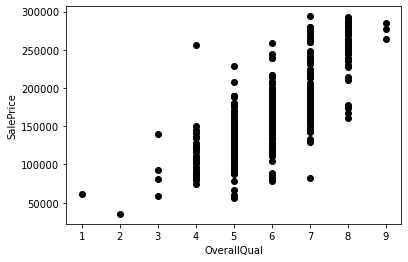

In [50]:
plt.scatter(X_test, y_test,  color='black') 
plt.xlabel('OverallQual') 
plt.ylabel('SalePrice') 
plt.plot(X_test, x.predict(X_test), color='red',linewidth=3) 
plt.show() 


In [51]:
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print ("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predictions)))

NameError: name 'predictions' is not defined

In [52]:
from sklearn.linear_model import LinearRegression
x=linear_model.LinearRegression()
x.fit(X_train,y_train)


ValueError: Expected 2D array, got 1D array instead:
array=[ 8  6  5  7  7  5  6  8  6  5  4  5  7  7  6  6  8  5  6  6  6  7  5  5
  5  5  6  8  7  5  8  5  7  4  7  5  6  7  7  5  5  5  6  5  6  6  6  5
  6  6  2  6  7  5  5  6  6  5  6  5  5  7  5  7  5  7  6  8  5  7  4  5
  8  7  5  4  5 10  8  7  7  3  6  5  6  5  5  6  4  5  6  4  5  6  6  3
  7  7  6  8  8  7  5  7  5  5  6  8  4  6  4  8  5  6  6  5  9  6  8  5
  6  4  5  5  7  4  5  4  4  5  5  7  5  6  5  6  6  5  3  6  5  5  7  7
  7  5  5  6  6  7  7  4  6  4  6  5  5  4  7  6  7  7  5  5  5  4  6  7
  5  5  7  6  6  6  6  6  6  6  8  6  7  5  6  4  5  6  7  5  4  5  7  8
  5  7  8  6  7  6  7  7  7  7  5  6  8  6  5  5  4  5  6  8  7  5  7  5
  7  6  5  7  7  5  6  5  6  6  5  5  8  5  7  5  5  5  7  5  5  7  8  7
  6  5  8  8  7  6  7  5  7  8  5  5  8  8  5  7  7  7  6  6  5  7  4  6
  7  6  7  6  4  7  5  5  3  6  6  7  8  7  5  7  5  5  7  6  5  6  7  7
  8  6  1  4  5  6  7  5  5  4  6  5  6  7  6  6  6  6  5  6  5  7  5  4
  7  8  5  7  6  8  5  8  5  3  6  5  5  6  5  4  7  4  6  7  6  4  6  6
  5  7  7  3  7  5  6  6  4  7  5  4  5  6  7  5  6  7  5  4  5  6  6  5
  8  5  3  8  6  7  6  4  4  5  5  6  5  4  7  4  4  6  7  6  7  7  6  5
  6  6  7  6  5  5  5  5  6  4  8  6  7  6  6  7  7  7  6  5  7  5  5  6
  3  7  4  5  4  7  4  5  5  5  9  8  6  6  8  5  4  8  7  7  7  5  2  6
  8  7  4  4  4  6  4  6  7  7  3  4  5  8  6  5  4  6  5  5  5  6  6  5
  5  7  4  5  6  6  7  6  5  6  6  6  6  5  5  6  6  7  6  6  7  6  7  5
  5  5  5  5  6  7  7  6  6  8  6  4  7  6  5  7  6  5  5  5  7  6  3  3
  5  4  7  8  7  8  7  6  7  6  7  6  5  7  6  5  5  6  7  7  8  5  5  7
  5  5  7  7  5  6  5  7  5  6  5  6  8  5  8  5  8  5  8  4  5  6  8  8
  4  7  5  7  7  6  7  7  5  7  5  5  6  5  5  6  5  7  6  5  7  4  7  5
  5  5  6  5  7  7  7  7  6  6  5  5  6  4  7  7  7  5  6  7  4  6  8  4
  7  6  6  7  7  5  8  8  6  8  4  5  5  7 10  4  6  5  6  6  5  8  8  7
  6  6  4  6  7  6  5  6  6  5  4  6  4  6  6  4  6  7  6  6  6  5  5  8
  6  6  5  7  5  6  8  4  6  4  7  8  7  7  8  3  4  4  6  4  6  7  7  5
  7  5  6  7  6  8  6  6  6  6  4  7  7  5  5  6  6  7  4  7  5  7  7  7
  6  5  5  6  6  7  5  7  5  6  6  7  5  5  5  7  8  4  6  7  7  5  5  6
  5  5  6  6  6  3  4  7  7  7  5  8  6  6  7  6  7  5  5  5  5  7  6  6
  5  8  7  5  8  3  6  6  5  4  5  7  8  4  5  6  6  7  5  5  7  7  7  5
  6  5  6  7  5  8  7  6  7  6  8  5  5  5  7  7  7  7  3  8  6  6  7  7
  7  6  7  7  6  5  5  6  6  6  6  5  5  7  6  8  6  6  6  6  6  6  7  8
  7  8  5  5  6  5  6  6  5  6  7  5  5  4  5  4  5  5  5  5  6  8  6  5
  5  4  6  5  5  4  6  5  7  5  6  8  7  5  7  5  5  8  4  6  4  5  6  5
  6  5  7  7  5  4  4  6  6  6  7  8  5  6  6  8  5  6  6  5  8  4  6  8
  7  6  6  5  6  4  6  5  6  5  4  7  7  7  5  6  4  6  6  5  4  5  5  4
  5  5  6  3  5  7  6  8  6  4  5  6  8  4  6  4  7  5  7  5  7  7  7  6
  6  6  7  7  6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.